### Auralin vs Novdra Drug Efficacy Analysis

Core components of out report
- Introduction (intro)
- Body (Findings)
- Conclusion (recommendations)

#### Introduction

- Background of the problem
- Objective(s) of the analysis
- Scope and limitations



##### Background of the problem

Increasing rates of incurable diabeted cases has spurred research and development of more efficient and patient-friendly means to manage cases. A new drug __Auralin__ has been developed to replace the current syringe-injected __novodra__. Auralin is meant to provide ease and a more comfortable option to diabetics.

##### Objectives of the analysis

1. Determine the efficacy of Auralin compared to Novodra
2. Determine and compare the adverse reactions
3. Economic viability of Auralin

##### Scope and limitations

1. The clinical trials contained data from 350 treated patients
2. The data was delivered containing null values for contact information
3.  Missing values in the `address, city, state, country, contact, zip_code`
4.  Some states in the `state` column are acronyms while others are long form
5. `zip_code` column is a float and not a string
6. Multiple phone number formats, the phone number and email addresses are in the same column



##### Data Collection
3 csv files: `patients.csv`, `treatments.csv`, `adverse_reactions.csv` containing information on patients, treatments administered, and adverse reactions were downloaded and used for the analysis

- Tools used for gathering

  MySQL Database, Twitter API

##### About the Data set

The data is gotten from a clinical trial for a new drug called "auralin". It has been tested on a numbers of patients and the results of the test have been recorded including the adverse reactions.

Our analysis is to compare auralin and novodra. Novodra is the current drug available, which is administered using a syringe.The drug needs to be administered multiple times in a day.

Auralin is the experimental drug that would be admistered orally


##### Data Cleaning and Preparation

- Handling missing values and duplicates

  Duplicate rows were removed and null values were left as it is. 
  There were contact details that could not be re-acquired from the patients.

  missing values in a patient giving name was corrected

  Patients states were all made to be in acronym


  Email address were extracted from patients phone number using regex

  

  
  
- Data type conversions

  Converted weight from pounds to kg, and height from feet to meters


- Tools/libraries used

  pandas, NumPy,regex matplotlib and seaborn 

###### Import the required Python libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
patients = pd.read_csv('patients_clean.csv')
treatments = pd.read_csv('treatments_clean.csv')

In [3]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,1976-07-10,121.7,66,19.6,951-719-9170,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,1967-04-03,118.8,66,19.2,1 (217) 569-3204,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467,United States,1980-02-19,177.8,71,24.8,402-363-6804,JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,1951-07-26,220.9,70,31.7,1 (732) 636-8246,PhanBaLiem@jourrapide.com
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,1928-02-18,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de


In [20]:
treatments.head()

,patient_id,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose,adverse_reaction,dose_change
0,1,7.71,7.30,0.41,novodra,33,33,NaN,0
1,2,9.53,9.10,0.43,novodra,27,29,NaN,2
2,4,7.58,7.10,0.48,novodra,43,48,NaN,5
3,6,7.73,7.34,0.39,auralin,50,60,NaN,10
4,7,7.65,7.26,0.39,novodra,32,33,NaN,1


#### Exploratory Data Analysis (EDA)

- 

#### Patients Gender

In [5]:
plt.rcParams['figure.figsize'] = [5,3]

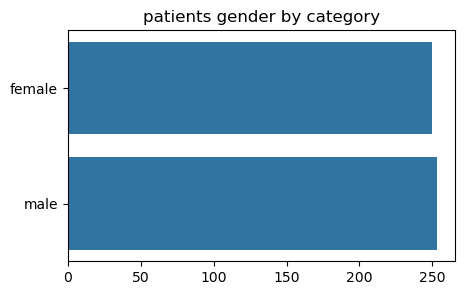

In [21]:
sns.countplot(patients.assigned_sex)
plt.title( 'patients gender by category')
plt.ylabel("")
plt.xlabel("");

#### Patients unique State

In [7]:
width = patients.state.value_counts().head(10).values

In [8]:
y = patients.state.value_counts().head(10).index

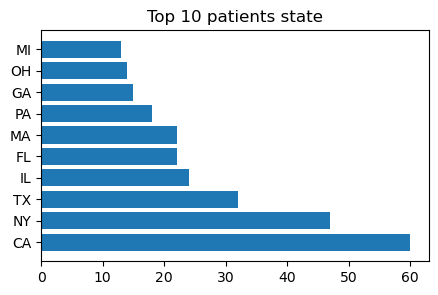

In [9]:
plt.barh(y=y,width=width)

plt.title( 'Top 10 patients state')
plt.ylabel("")
plt.xlabel("");

#### End dose and Start dose treatment of Novodra and Auralin

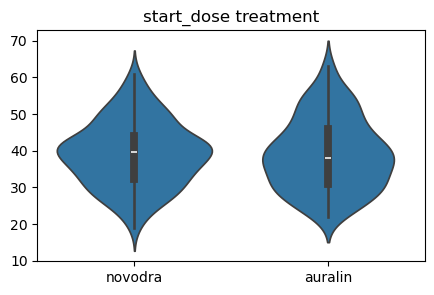

In [10]:
sns.violinplot(data = treatments, x='treatment', y='start_dose')
plt.title('start_dose treatment')
plt.ylabel("")
plt.xlabel("");

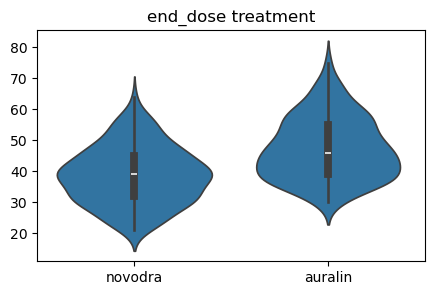

In [11]:
sns.violinplot(data = treatments, x='treatment', y='end_dose')
plt.title('end_dose treatment')
plt.ylabel("")
plt.xlabel("");

From the above figures,we have observed that the distribution of the start and end doses for both Auralin and novodra are similar

In [12]:
treatments['dose_change'] = treatments.end_dose - treatments.start_dose

In [13]:
treatments.groupby(['treatment'])['dose_change'].mean()

treatment
auralin    8.325714
novodra   -0.385057
Name: dose_change, dtype: float64

##### On average, auralin requires more dosage then novodra

The average dose change of 8 vs -0.4 is not bad for the following reason:

- because auralin is an oral drug, it needs more dosage to enter the bloodstream
- while novodra is injected directed into the bloodstream

> we can conclude that given the acceptable dosage difference, auralin is economically viable


#### The adverse reactions for both drugs


In [14]:
reaction = treatments.groupby(['treatment'])['adverse_reaction'].value_counts()

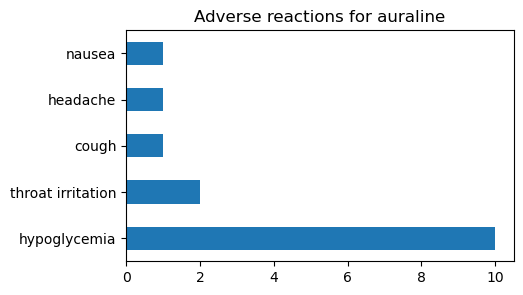

In [15]:
reaction.auralin.plot(kind='barh')
plt.title('Adverse reactions for auraline')
plt.ylabel("");

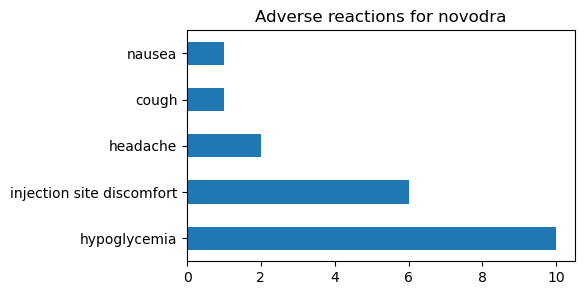

In [19]:
reaction.novodra.plot(kind='barh')
plt.title('Adverse reactions for novodra')
plt.ylabel("");

From the above figures, we can conclude that Auraline has lesser adverse reactions to Novodra.

#### we will proceed to test for the efficacy of the drugs

In [17]:
efficacy = treatments.groupby(['treatment'])['hba1c_change'].mean()
efficacy

treatment
auralin    0.387657
novodra    0.404713
Name: hba1c_change, dtype: float64

The average hbA1c level change for auralin and novodra weren't so different.

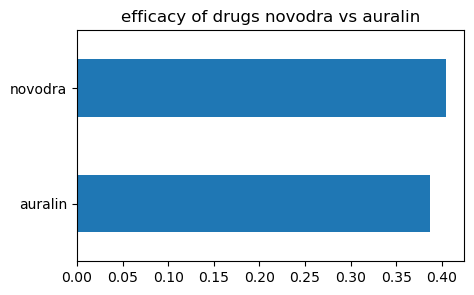

In [18]:
efficacy.plot(kind='barh')
plt.title('efficacy of drugs novodra vs auralin')
plt.ylabel("");

From the above figure, we can conclude that the efficacy of auralin and novodra were almost similar

#### Conclusion (recommendations)
-  Quantified impact

   Novodra is only 4% more effective than Auralin, but Auralin has lesser adverse reactions.

- What the stakeholders should do next

1. Move to phase 3 clinical trials.

- Short-term and long-term actions

1. Consider mass producing auralin for international sales and distribution.
2. Enagage regulators to test and certify the drug.